In [2]:
import os,sys
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
from PyComplexHeatmap import *

In [3]:
beta = pd.read_csv("beta.csv",sep="\t",index_col=0)
df_row  = pd.read_csv("df_row.csv",sep="\t",index_col=0)
df_col  = pd.read_csv("df_col.csv",sep="\t",index_col=0)

In [4]:
beta.head()

,204875570030_R01C02,204875570030_R04C01,204875570030_R05C01,204875570030_R06C01,204875570035_R05C02,204875570035_R06C02,204875570040_R05C01,204875570040_R06C01,204875570042_R01C02,204875570042_R06C01,...,204875570072_R05C01,204875570072_R06C01,204875570030_R02C02,204875570030_R03C02,204875570056_R03C02,204875570056_R04C02,204875570072_R02C02,204875570072_R03C02,204875570074_R01C01,204875570074_R02C01
cg30848532_TC21,0.525089,0.419515,0.483276,0.460750,0.390317,0.430851,0.382408,0.534956,0.433906,0.438497,...,0.447966,0.410878,0.913936,0.925914,0.912654,0.922952,0.892351,0.887552,0.913558,0.911709
cg30147375_BC21,0.803776,0.585928,0.510269,0.831463,0.550146,0.543652,0.530830,0.657165,0.770499,0.851434,...,0.560758,0.549217,0.912016,0.927996,0.895049,0.907319,0.754189,0.472090,0.892930,0.906962
cg46239718_BC21,0.443958,0.517514,0.535909,0.450167,0.564107,0.541439,0.481848,0.586821,0.443813,0.464538,...,0.496050,0.446700,0.500303,0.494194,0.466824,0.470673,0.395620,0.429222,0.476087,0.424929
cg36100119_BC21,0.351977,0.528846,0.524896,0.374422,0.551200,0.470039,0.376092,0.437315,0.505029,0.603591,...,0.434929,0.221916,0.484401,0.564649,0.267277,0.279276,0.392683,0.380804,0.645344,0.658437
cg42738582_BC21,0.783958,0.724901,0.802178,0.848621,0.850481,0.859830,0.867916,0.689595,0.719369,0.754445,...,0.828297,0.757166,0.784072,0.809042,0.810049,0.776605,0.795150,0.805054,0.790767,0.630837


In [5]:
df_row.head()

,chr,Target,CpG,ExtensionBase,ProbeDesign,CON,mapFlag,Group,Type
cg30848532_TC21,chr12,1,1,0,II,C,16,Suboptimal hybridization,1-1-0-CG-GG-II-C-16-GA-chr12-79760438
cg30147375_BC21,chr11,0,0,0,II,C,0,No Effect,0-0-0-ca-ac-II-C-0-AG-chr11-109557651
cg46239718_BC21,chr8,1,1,0,II,C,0,Artificial low meth. reading,1-1-0-cg-gt-II-C-0-GA-chr8-117860829
cg36100119_BC21,chr19,1,1,0,II,C,16,Suboptimal hybridization,1-1-0-CG-GG-II-C-16-GA-chr19-5877949
cg42738582_BC21,chr5,0,0,0,II,C,16,Suboptimal hybridization,0-0-0-AA-AA-II-C-16-AG-chr5-122031379


In [6]:
df_col.head()

,Strain,Tissue,Sex
204875570030_R01C02,MOLF_EiJ,Frontal Lobe Brain,Female
204875570030_R04C01,CAST_EiJ,Frontal Lobe Brain,Male
204875570030_R05C01,CAST_EiJ,Frontal Lobe Brain,Female
204875570030_R06C01,MOLF_EiJ,Frontal Lobe Brain,Male
204875570035_R05C02,CAST_EiJ,Liver,Male


In [7]:
tissue_col ={t:c for t,c in zip(['Frontal Lobe Brain','Liver','Tail','Spleen'],["#00E5FF","#6CBF00","#007F19","#FF0000"])} 
strain_col ={t:c for t,c in zip(['CAST_EiJ','MOLF_EiJ','PWK_PhJ'],['#66AA9F','#8A6699','#D8A49C'])}
target_col ={t:c for t,c in zip([0,1],['yellowgreen','orangered'])}
group_col ={t:c for t,c in zip(['Artificial high meth. reading','Artificial low meth. reading','G-R','No Effect','R-G','Suboptimal hybridization'],
                               ['darkorange','skyblue','red','wheat','green','darkgray'])}

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


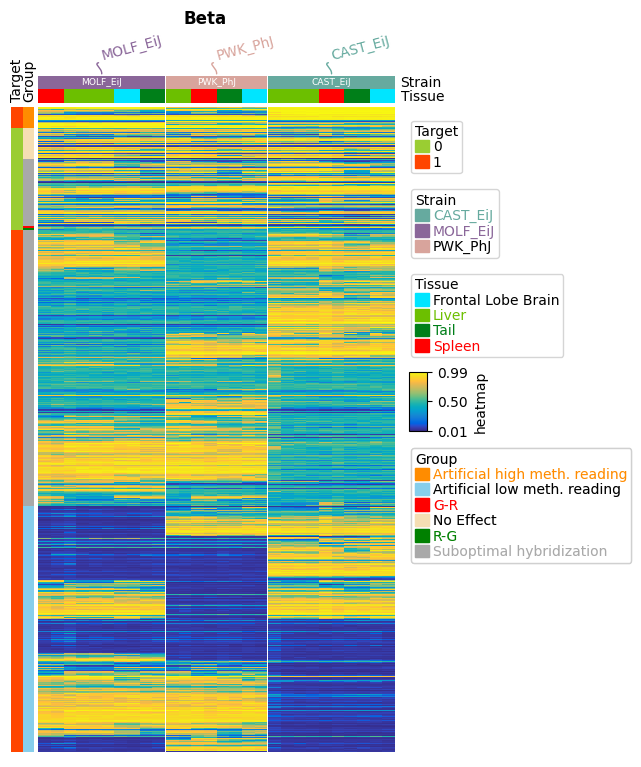

In [8]:
row_ha = HeatmapAnnotation(Target=anno_simple(df_row.Target,colors=target_col,rasterized=True),
                           Group=anno_simple(df_row.Group,colors=group_col,rasterized=True),
                           axis=0)
col_ha= HeatmapAnnotation(label=anno_label(df_col.Strain,colors=strain_col,merge=True,rotation=15),
                          Strain=anno_simple(df_col.Strain,colors=strain_col,add_text=True),
                          Tissue=anno_simple(df_col.Tissue,colors=tissue_col),
                          axis=1)
plt.figure(figsize=(5, 8))
cm = ClusterMapPlotter(data=beta, top_annotation=col_ha, left_annotation=row_ha,
                     show_rownames=False,show_colnames=False,
                     row_dendrogram=False,col_dendrogram=False,
                     row_split=df_row.loc[:, ['Target', 'Group']],
                     col_split=df_col['Strain'],cmap='parula',
                     rasterized=True,row_split_gap=0,legend=True,legend_anchor='ax_heatmap',legend_vpad=5)
cm.ax.set_title("Beta",y=1.03,fontdict={'fontweight':'bold'})
plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.show()